In [203]:
import numpy as np
import matplotlib.pyplot as plt
import numpy.fft as fft
from scipy.integrate import quad

In [204]:
num_frames = 100
timestep = 0.05
t_vals = np.linspace(0.0, (num_frames)*timestep, num_frames+1)
t_vals = t_vals[:-1]
print(t_vals)
# s_vals = np.linspace(0.0, 2*np.pi, 101)
s_vals = np.linspace(0.1, 1000.1, 101)
# s_vals[0] = 1e-10
s_vals = s_vals[:-1]
print(s_vals)
r_vals = np.linspace(0.0, 10.0, 501)
r_vals = r_vals[:-1]

[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.   1.05 1.1  1.15 1.2  1.25 1.3  1.35
 1.4  1.45 1.5  1.55 1.6  1.65 1.7  1.75 1.8  1.85 1.9  1.95 2.   2.05
 2.1  2.15 2.2  2.25 2.3  2.35 2.4  2.45 2.5  2.55 2.6  2.65 2.7  2.75
 2.8  2.85 2.9  2.95 3.   3.05 3.1  3.15 3.2  3.25 3.3  3.35 3.4  3.45
 3.5  3.55 3.6  3.65 3.7  3.75 3.8  3.85 3.9  3.95 4.   4.05 4.1  4.15
 4.2  4.25 4.3  4.35 4.4  4.45 4.5  4.55 4.6  4.65 4.7  4.75 4.8  4.85
 4.9  4.95]
[1.000e-01 1.010e+01 2.010e+01 3.010e+01 4.010e+01 5.010e+01 6.010e+01
 7.010e+01 8.010e+01 9.010e+01 1.001e+02 1.101e+02 1.201e+02 1.301e+02
 1.401e+02 1.501e+02 1.601e+02 1.701e+02 1.801e+02 1.901e+02 2.001e+02
 2.101e+02 2.201e+02 2.301e+02 2.401e+02 2.501e+02 2.601e+02 2.701e+02
 2.801e+02 2.901e+02 3.001e+02 3.101e+02 3.201e+02 3.301e+02 3.401e+02
 3.501e+02 3.601e+02 3.701e+02 3.801e+02 3.901e+02 4.001e+02 4.101e+02
 4.201e+02 4.301e+02 4.401e+02 4.501e+02 4.601e+02 4.701e+02 4.80

In [205]:
num_alphas = 10
alphlowlim = 0.0
alphhighlim = 0.9
num_ds = 50
dlowlim = 0.0
dhighlim = 4.9

In [206]:
alpha_vals = np.linspace(alphlowlim, alphhighlim, num_alphas)
print(alpha_vals)
alpha_vals[0] = 1e-10 # set alpha=0 to a small value
d_vals = np.linspace(dlowlim, dhighlim, num_ds)
print(d_vals)
d_vals[0] = 1e-10 # set d=0 to a small value

# print the shape of the data
print(f"shape of alpha_vals : {alpha_vals.shape}")
print(f"shape of d_vals : {d_vals.shape}")

[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9]
[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7
 1.8 1.9 2.  2.1 2.2 2.3 2.4 2.5 2.6 2.7 2.8 2.9 3.  3.1 3.2 3.3 3.4 3.5
 3.6 3.7 3.8 3.9 4.  4.1 4.2 4.3 4.4 4.5 4.6 4.7 4.8 4.9]
shape of alpha_vals : (10,)
shape of d_vals : (50,)


In [207]:
# load the data from G_pred.txt
# the data is of shape (time_frames, r_vals.shape[0])
G_pred = np.loadtxt("G_pred_test.txt")
print(f"shape of G_pred : {G_pred.shape}")

shape of G_pred : (100, 500)


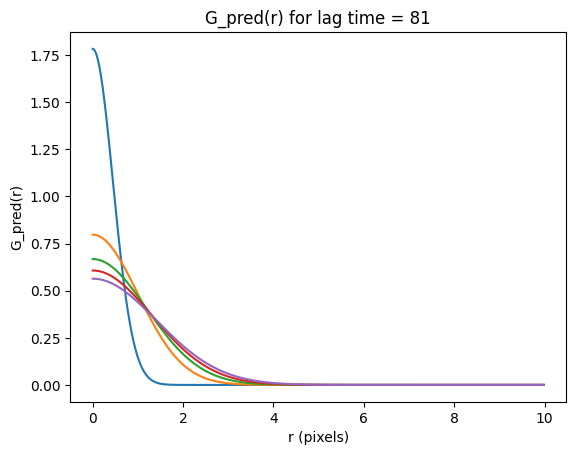

In [208]:
############### check this step ################
# G_pred = G_pred * 2 * np.pi * r_vals
############### check this step ################

# plot G_pred
for i in range(1, num_frames, 20):
    # plt.plot(r_vals, G_pred[i, :] * 2 * np.pi * r_vals)
    plt.plot(r_vals, G_pred[i, :])
    plt.xlabel("r (pixels)")
    plt.ylabel("G_pred(r)")
    plt.title(f"G_pred(r) for lag time = {i}")
    # plt.show()
plt.show()

In [209]:
# apply fft on r to get G_pred_k(t, k)
G_pred_k = fft.fft(G_pred, axis=1).real
print(f"shape of G_pred after fft : {G_pred.shape}")
# G_pred_k += 50
# print(f"max value of G_pred : {np.max(G_pred)}")

shape of G_pred after fft : (100, 500)


In [210]:
# get the range of k values
k_vals = fft.fftfreq(r_vals.shape[0], d=r_vals[1]-r_vals[0])
# k_vals = 2 * np.pi * k_vals
k_vals = fft.fftshift(k_vals)
G_pred_k = fft.fftshift(G_pred_k, axes=1)
# print(k_vals)
print(f"shape of k_vals : {k_vals.shape}")

shape of k_vals : (500,)


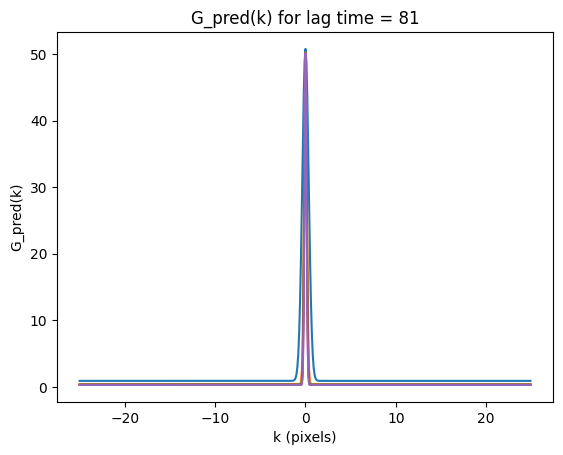

[ 0.89116955  0.89116955  0.89116955  0.89116955  0.89116955  0.89116955
  0.89116955  0.89116955  0.89116955  0.89116955  0.89116955  0.89116955
  0.89116955  0.89116955  0.89116955  0.89116955  0.89116955  0.89116955
  0.89116955  0.89116955  0.89116955  0.89116955  0.89116955  0.89116955
  0.89116955  0.89116955  0.89116955  0.89116955  0.89116955  0.89116955
  0.89116955  0.89116955  0.89116955  0.89116955  0.89116955  0.89116955
  0.89116955  0.89116955  0.89116955  0.89116955  0.89116955  0.89116955
  0.89116955  0.89116955  0.89116955  0.89116955  0.89116955  0.89116955
  0.89116955  0.89116955  0.89116955  0.89116955  0.89116955  0.89116955
  0.89116955  0.89116955  0.89116955  0.89116955  0.89116955  0.89116955
  0.89116955  0.89116955  0.89116955  0.89116955  0.89116955  0.89116955
  0.89116955  0.89116955  0.89116955  0.89116955  0.89116955  0.89116955
  0.89116955  0.89116955  0.89116955  0.89116955  0.89116955  0.89116955
  0.89116955  0.89116955  0.89116955  0.89116955  0

In [218]:
# plot G_pred
for i in range(1, num_frames, 20):
    # plt.plot(r_vals, G_pred[i, :] * 2 * np.pi * r_vals)
    plt.plot(k_vals, G_pred_k[i, :])
    plt.xlabel("k (pixels)")
    plt.ylabel("G_pred(k)")
    plt.title(f"G_pred(k) for lag time = {i}")
    # plt.show()
plt.show()
# print(G_pred_k[1, :])

In [212]:
# laplace transform of G_pred_k(t, k) on time to get u_pred(s, k)
u_pred = np.zeros((s_vals.shape[0], k_vals.shape[0]))
for i in range(s_vals.shape[0]):
    for j in range(k_vals.shape[0]):
        u_pred[i, j] = np.trapz(G_pred_k[:, j] * np.exp(-s_vals[i] * t_vals), t_vals)

# normalize the u_pred
# print(np.trapz(u_pred, k_vals, axis=1).reshape(-1, 1)[0])
# u_pred = u_pred / np.trapz(u_pred, k_vals, axis=1).reshape(-1, 1)

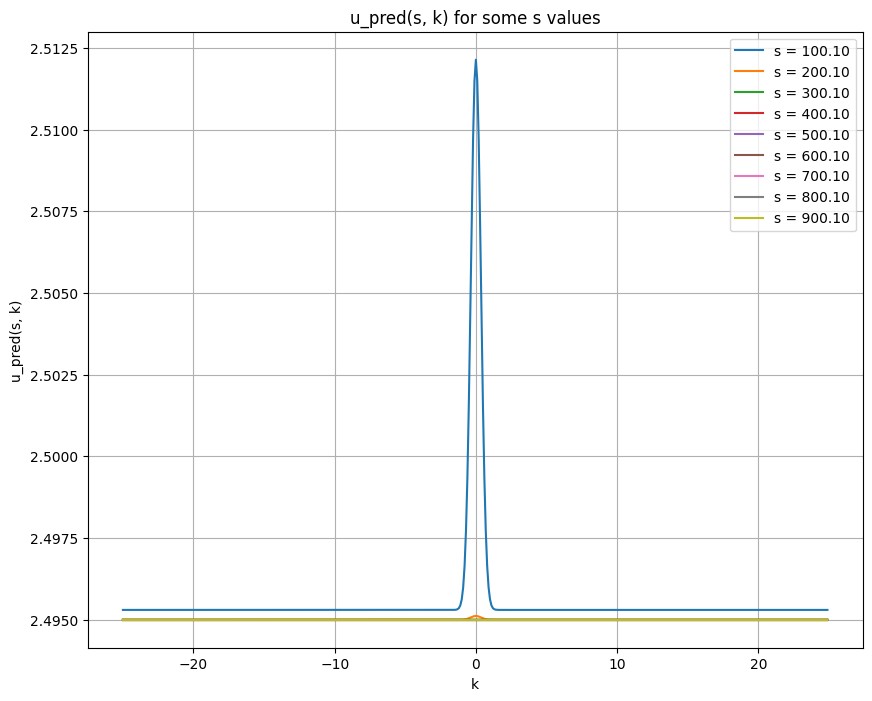

In [213]:
# plot the u_pred(s, k) for some s values
plt.figure(figsize=(10, 8))
plt.title("u_pred(s, k) for some s values")
plt.xlabel("k")
plt.ylabel("u_pred(s, k)")
plt.grid()
for i in range(0, s_vals.shape[0], 10):
    if i == 0:
        continue
    plt.plot(k_vals, u_pred[i, :], label=f"s = {s_vals[i]:.2f}")

plt.legend()
plt.show()

In [214]:
# save the data to u_pred.txt
np.savetxt("u.txt", u_pred)

$Z(\alpha, D, s, k) = \frac{s^{\alpha-1}}{s^{\alpha-1}+Dk^2}$

In [215]:
# calculate Z
# $Z(\alpha, D, s, k) = \frac{s^{\alpha-1}}{s^{\alpha-1}+Dk^2}$
Z = np.zeros((alpha_vals.shape[0], d_vals.shape[0], s_vals.shape[0], k_vals.shape[0]))
for i in range(alpha_vals.shape[0]):
    for j in range(d_vals.shape[0]):
        for k in range(s_vals.shape[0]):
            Z[i, j, k, :] = (s_vals[k]**(alpha_vals[i]-1)) / (s_vals[k]**(alpha_vals[i]) + d_vals[j]*k_vals**2)
# normalize Z to have integral of Z over r equal to 1
# Z = Z / np.sum(Z * (r_vals[1]-r_vals[0]))
print(f"shape of Z : {Z.shape}")
print(f"max value of Z : {np.max(Z)}")
print(f"min value of Z : {np.min(Z)}")
print(f"mean value of Z : {np.mean(Z)}\n")

print(f"max value of u_pred : {np.max(u_pred)}")
print(f"min value of u_pred : {np.min(u_pred)}")
print(f"mean value of u_pred : {np.mean(u_pred)}")

shape of Z : (10, 50, 100, 500)
max value of Z : 10.0
min value of Z : 3.2968793559571087e-07
mean value of Z : 0.005966405156575882

max value of u_pred : 197.4921315166804
min value of u_pred : 2.495
mean value of u_pred : 2.5255810290549685


In [216]:
# save the data to Z.npy
np.save("Z.npy", Z)